### Linear Regression - Diagnostics

We will run through some diagnostics to make sure our Linear Regression assumptions are met using `seaborn` and `statsmodels`. 

We know that Linear Regression works best when: 

1. The data is normally distributed (but doesn’t have to be)

2. Correlation among X’s is low

3. X’s significantly explain y (have low p-values)


In [56]:
%matplotlib inline
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [25]:
# read data into a DataFrame
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.10,37.80,69.20,22.10
2,44.50,39.30,45.10,10.40
3,17.20,45.90,69.30,9.30
4,151.50,41.30,58.50,18.50
5,180.80,10.80,58.40,12.90


### Check 1. Univariate Distributions

In [26]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.00,200.00,200.00,200.00
mean,147.04,23.26,30.55,14.02
std,85.85,14.85,21.78,5.22
min,0.70,0.00,0.30,1.60
25%,74.38,9.97,12.75,10.38
50%,149.75,22.90,25.75,12.90
75%,218.82,36.52,45.10,17.40
max,296.40,49.60,114.00,27.00


#### Takeaways:
- No missing variables
- The locations of distributions vary
- TV & Radio seem reasonably symmetric at first sight
- Newspaper suspect of outliers
- Sales look a bit positively skewed

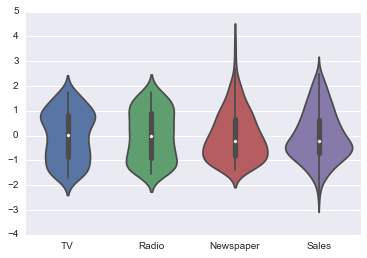

In [37]:
# Let's compare the standardized distributions
sns.violinplot(data=data.apply(lambda x: (x-x.mean())/x.std()));

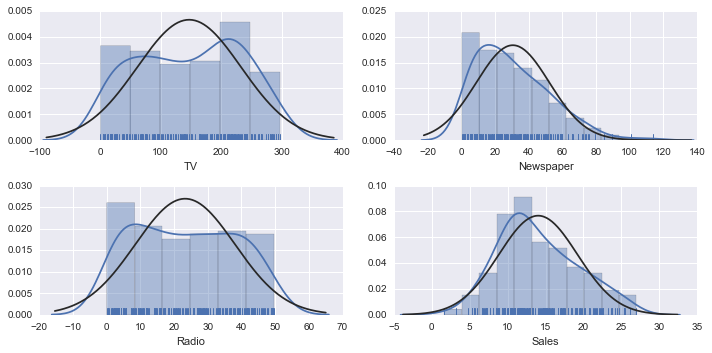

In [47]:
from scipy.stats import norm
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))
for i, col in enumerate(data.columns):
    sns.distplot(data[col], ax=axes[i%2, int(i/2)], fit=norm, rug=True)
plt.tight_layout()

In [57]:
# Newspaper looks skewed:
data.Newspaper.skew()

0.89472040749861748

#### Takeaways:
- Advertisement data are not normally distributed - TV & Radio are closer to uniform distribution, Newspaper is positively skewed.
- Sales, on the other hand, is closer to a normal distribution

But we ultimately care about the distribution of the residuals of the multiple linear regression!

#### Residuals from simple regressions of the advertisement on the sales

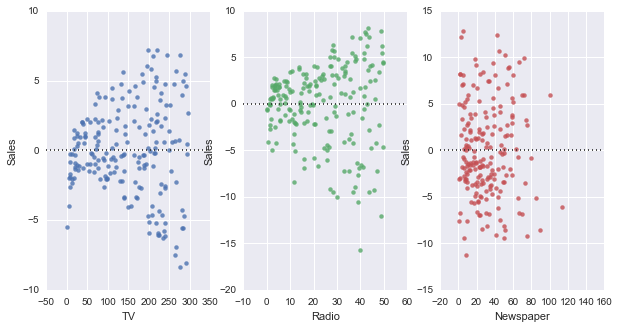

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
for i, col in enumerate(['TV', 'Radio', 'Newspaper']):
    sns.residplot(y='Sales', x=col, data=data, ax=axes[i])

#### Takeaways:
- for a simple (univariate) regression, residuals do not seem to have equal variance for all X values. 
- This is called 'heteroscedasticity' and implies that our test statistics will be biased. 

#### Last time we plotted our data like this

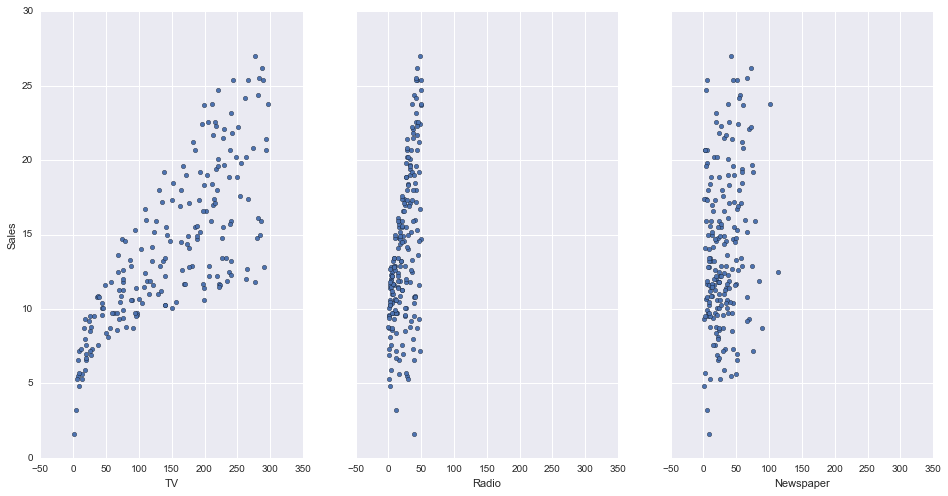

In [22]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True, sharex=True)
data.plot.scatter(x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot.scatter(x='Radio', y='Sales', ax=axs[1])
data.plot.scatter(x='Newspaper', y='Sales', ax=axs[2]);

### Seaborn plotting library 
https://stanford.edu/~mwaskom/software/seaborn/index.html

Today we use lmplot https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.lmplot.html


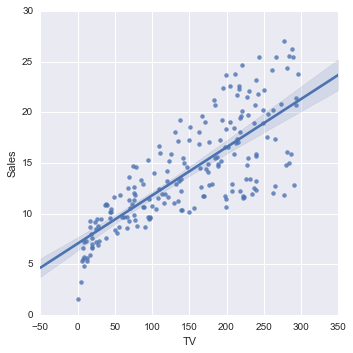

In [19]:
sns.lmplot('TV', 'Sales', data);

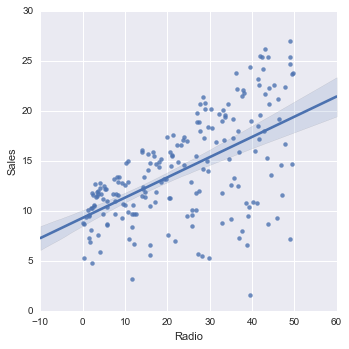

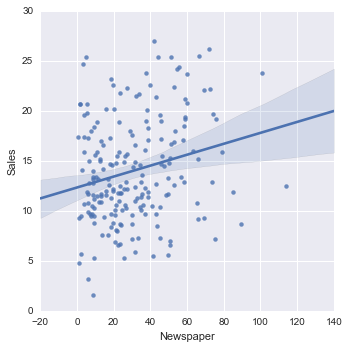

In [6]:
sns.lmplot('Radio', 'Sales', data)
sns.lmplot('Newspaper', 'Sales', data);

## Check 2. Low Multicollinearity

               TV   Radio  Newspaper
TV         1.0000  0.0548     0.0566
Radio      0.0548  1.0000     0.3541
Newspaper  0.0566  0.3541     1.0000


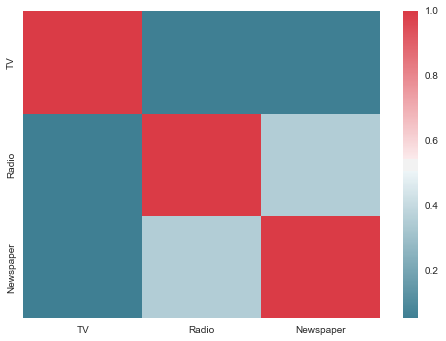

In [7]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

correlations = data[['TV', 'Radio', 'Newspaper']].corr()
print correlations
sns.heatmap(correlations, cmap=cmap);

### Student question: 
1. Do these variables have collinearity? 

Answer: 

## Check 3: X’s significantly explain y (have low p-values)

#### Let's take a look again the the crude model

In [8]:
lm = smf.ols(formula='Sales ~ TV', data=data).fit()

#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 28 Jul 2016   Prob (F-statistic):           1.47e-42
Time:                        11:02:12   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000         6.130     7.935
TV             0.0475      0.003     17.668      0.000         0.042     0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Student Model
#### Now do a full model with TV, Radio and Newspaper
syntax can be found here: http://statsmodels.sourceforge.net/devel/example_formulas.html

In [13]:
#fit model
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()

#print summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 08 May 2016   Prob (F-statistic):           1.58e-96
Time:                        12:10:40   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000         2.324     3.554
TV             0.0458      0.001     32.809      0.000         0.043     0.049
Radio          0.1885      0.009     21.893      0.000         0.172     0.206
Newspaper     -0.0010      0.006     -0.177      0.860        -0.013     0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 1. Which of the media buys were significantly associated with the sales? 

Answer: TV 95%CI (0.043, 0.049) and Radio (0.172, 0.206). Note that Newspaper crosses 0 and is not statisically significant here. 

#### 2. Controlling for all the other media buys, which media type had the largest association with sales?

Answer: Radio

#### 3. Given that one of the variables above was not significant do we drop it from our model? Why or why not? 

Answer: We don't drop it simply becuase it is not significant. We can do a comparison with other models to determine if keeping the variable improves our model uses metrics we will learn in the next class.